### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №1

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гусейнов Вахид Азерович
##### Группа:   НБИбд-01-17

## Москва 2020
***

### Вариант № 15

n = 100

a = (1, 0)

R = ((1, 1), (1, 2))

dataset - http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

1. Используя функционал библиотеки NumPy, постройте n значений случайных признаков X и Y , имеющих (двумерное) гауссовское распределение с математическим ожиданием a и корреляционной матрицей R .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 100
a = [1, 0]
r = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean=a, cov=r, size=n).T

2. Вычислите и выведите на экран для построенных значений признаков X и Y математические ожидания, дисперсии, а также корреляцию между признаками.

In [3]:
print('Математическое ожидание X =', x.mean())
print('Математическое ожидание Y =', y.mean())
print('Дисперсия X =', x.var())
print('Дисперсия Y =', y.var())
print('Корреляция между X и Y =', np.corrcoef(x, y)[0, 1])

Математическое ожидание X = 0.8661156955693994
Математическое ожидание Y = -0.13135218012582914
Дисперсия X = 1.0599002195960328
Дисперсия Y = 2.2482502871731804
Корреляция между X и Y = 0.7681679840709431


3. Визуализируйте построенные данные на плоскости в виде точек. Визуализируйте математическое ожидание на плоскости в виде точки другого цвета и с другим маркером.

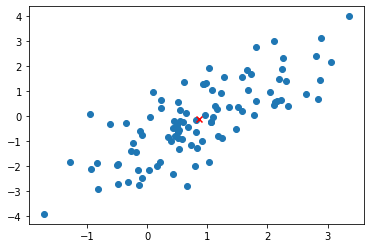

In [4]:
plt.scatter(x, y)
plt.scatter(x.mean(), y.mean(), c='r', marker='x')
plt.show()

4. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI.

In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, header=None, delim_whitespace=True, prefix='V')
data.replace('?', np.nan, inplace=True)

5. Проведите исследование набора данных, выявляя числовые и категориальные признаки. Если какие-то из признаков были неправильно классифицированы как категориальные, то преобразуйте их в числовые. Если в наборе присутствуют незаполненные значения, то игнорируйте такие записи.

In [6]:
data = data.dropna()

In [7]:
data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      392 non-null    float64
 1   V1      392 non-null    int64  
 2   V2      392 non-null    float64
 3   V3      392 non-null    object 
 4   V4      392 non-null    float64
 5   V5      392 non-null    float64
 6   V6      392 non-null    int64  
 7   V7      392 non-null    int64  
 8   V8      392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [9]:
data['V3'] = data['V3'].astype(float)

Числовые признаки V0 - V7

Категориальные признак V8

6. Для числового признака, имеющего наибольшую дисперсию, постройте эмпирическую функцию распределения (CDF) и визуализируйте ее в виде графика на плоскости.

In [10]:
data.var()

V0        60.918142
V1         2.909696
V2     10950.367554
V3      1481.569393
V4    721484.709008
V5         7.611331
V6        13.569915
V7         0.648860
dtype: float64

Наибольшая дисперсия у V4

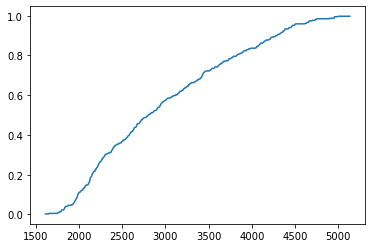

In [11]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

npoints = 500
samples = data['V4'].values
xlist = [samples.min() + (samples.max() - samples.min()) * i / npoints
        for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]
plt.plot(xlist, ylist);

7. Найдите числовой признак, наименее коррелированный с числовым признаком, имеющим наибольшую дисперсию.

In [12]:
data.corr()['V7']

V0    0.565209
V1   -0.568932
V2   -0.614535
V3   -0.455171
V4   -0.585005
V5    0.212746
V6    0.181528
V7    1.000000
Name: V7, dtype: float64

V6 - наименее скореллированный признак

8. Для этого признака постройте эмпирическую плотность распределения (PDF) и визуализируйте ее в виде гистограммы.

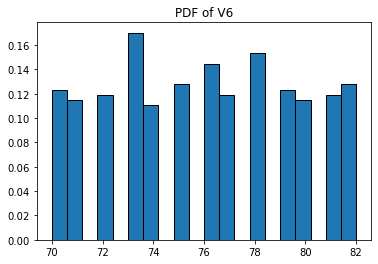

In [13]:
plt.hist(data['V6'].values, edgecolor = 'black', bins = 20, density=True)
plt.title('PDF of V6');

9. Вычислите и выведите на экран для указанных выше двух признаков математические ожидания, дисперсии, а также корреляцию между признаками.

In [14]:
print('Математическое ожидание V4 =', data['V4'].mean())
print('Математическое ожидание V6 =', data['V6'].mean())
print('Дисперсия V4 =', data['V4'].var()) # несмещенная дисперсия
print('Дисперсия V6 =', data['V6'].var())
print('Корреляция между V4 и V6 =', np.corrcoef(data['V4'], data['V6'])[0, 1])

Математическое ожидание V4 = 2977.5841836734694
Математическое ожидание V6 = 75.9795918367347
Дисперсия V4 = 721484.7090075163
Дисперсия V6 = 13.569914922490751
Корреляция между V4 и V6 = -0.30911988083081604
